<a href="https://colab.research.google.com/github/JefNtungila/Brunel/blob/main/Word_Count_Analysis_of_Tweets_about_Brunel_University_Using_Python_and_Hadoop_MapReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word Count Analysis of Tweets about Brunel University Using Python and Hadoop MapReduce

## Hadoop Introduction
Hadoop is a Java-based programming framework that supports the processing and storage of extremely large datasets on a cluster of inexpensive machines. It was the first major open source project in the big data playing field and is sponsored by the Apache Software Foundation.

## Installing Hadoop

In [1]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz


--2021-04-27 17:44:09--  https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 2a01:4f8:10a:201a::2
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500749234 (478M) [application/x-gzip]
Saving to: ‘hadoop-3.3.0.tar.gz’

hadoop-3.3.0.tar.gz 100%[===================>] 477.55M  30.8MB/s    in 16s     

2021-04-27 17:44:26 (29.6 MB/s) - ‘hadoop-3.3.0.tar.gz’ saved [500749234/500749234]



The tar command is usedwith the -x flag to extract, -z to uncompress, -v for verbose output, and -f to specify that we’re extracting from a file

In [2]:
!tar -xzvf hadoop-3.3.0.tar.gz

Streaming output truncated to the last 5000 lines.
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/FSDataOutputStream.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/TrashPolicyDefault.Emptier.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/HarFileSystem.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/PathExistsException.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/XAttrSetFlag.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-

In [3]:
#copy  hadoop file to user/local
!cp -r hadoop-3.3.0/ /usr/local/

## Configuring Hadoop’s Java Home
Hadoop requires that you set the path to Java, either as an environment variable or in the Hadoop configuration file.

In [4]:
#To find the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


To set java path, go to /usr/local/hadoop-3.3.0/etc/hadoop/hadoop-env.sh then

. . .
export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64/
 . . . 

## Running Hadoop

In [5]:
#Running Hadoop
!/usr/local/hadoop-3.3.0/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in slave mode
hosts filename                   list of hosts to use in slave mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
    

In [6]:
!mkdir ~/input
!cp /usr/local/hadoop-3.3.0/etc/hadoop/*.xml ~/input

In [7]:
!ls ~/input

capacity-scheduler.xml	hdfs-rbf-site.xml  kms-acls.xml     yarn-site.xml
core-site.xml		hdfs-site.xml	   kms-site.xml
hadoop-policy.xml	httpfs-site.xml    mapred-site.xml


In [13]:
!cat ~/grep_example/*

22	allowed.
1	allowed


## Hadoop Map Reduce Application

In [8]:
!wget https://raw.githubusercontent.com/JefNtungila/Brunel/main/brunel_university.txt

--2021-04-27 17:46:24--  https://raw.githubusercontent.com/JefNtungila/Brunel/main/brunel_university.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10773 (11K) [text/plain]
Saving to: ‘brunel_university.txt’

brunel_university.t 100%[===================>]  10.52K  --.-KB/s    in 0s      

2021-04-27 17:46:24 (111 MB/s) - ‘brunel_university.txt’ saved [10773/10773]



In [9]:
!wget https://raw.githubusercontent.com/anjalysam/Hadoop/master/mapper.py

--2021-04-27 17:46:26--  https://raw.githubusercontent.com/anjalysam/Hadoop/master/mapper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 767 [text/plain]
Saving to: ‘mapper.py’

mapper.py           100%[===================>]     767  --.-KB/s    in 0s      

2021-04-27 17:46:26 (57.6 MB/s) - ‘mapper.py’ saved [767/767]



In [10]:
!wget https://raw.githubusercontent.com/anjalysam/Hadoop/master/reducer.py

--2021-04-27 17:46:28--  https://raw.githubusercontent.com/anjalysam/Hadoop/master/reducer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1169 (1.1K) [text/plain]
Saving to: ‘reducer.py’

reducer.py          100%[===================>]   1.14K  --.-KB/s    in 0s      

2021-04-27 17:46:28 (69.2 MB/s) - ‘reducer.py’ saved [1169/1169]



In [11]:
!find / -name 'hadoop-streaming*.jar'

/usr/local/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-test-sources.jar
/usr/local/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-sources.jar
/usr/local/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar
/content/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-test-sources.jar
/content/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-sources.jar
/content/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar


In [12]:
!chmod u+rwx /content/mapper.py
!chmod u+rwx /content/reducer.py

In [13]:
!/usr/local/hadoop-3.3.0/bin/hadoop jar /usr/local/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar -input /content/brunel_university.txt -output /content/output -file /content/mapper.py  -file /content/reducer.py  -mapper 'python mapper.py'  -reducer 'python reducer.py'

2021-04-27 17:47:12,006 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/mapper.py, /content/reducer.py] [] /tmp/streamjob10391495111485230748.jar tmpDir=null
2021-04-27 17:47:12,931 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2021-04-27 17:47:13,223 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2021-04-27 17:47:13,224 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2021-04-27 17:47:13,246 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2021-04-27 17:47:13,454 INFO mapred.FileInputFormat: Total input files to process : 1
2021-04-27 17:47:13,485 INFO mapreduce.JobSubmitter: number of splits:1
2021-04-27 17:47:13,939 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local468519383_0001
2021-04-27 17:47:13,940 INFO mapreduce.JobSubmitter: Executing with tokens: []
2021-04-27 17:47:14,365 INFO mapred.Loc

In [14]:
!ls /content/output

part-00000  _SUCCESS


In [15]:
!cat /content/output/part-00000

01810114991	1
1	1
11pm	1
1276	1
12noon	1
17101982	1
1800pm	1
1830	2
1845pm	1
19	1
1971	1
199899	1
2008	1
2010	1
20170504	2
24081983	1
25	1
28th	2
3	1
321	1
3ph	1
3pm	1
712	1
82	1
83	1
9k	1
academy	1
accepted	1
achieve	1
actually	1
add	1
address	1
adopting	1
adopts	4
african	2
aids	1
aijazi	1
alexandra	1
algerian	1
amazing	2
american	1
among	1
amp	1
analysis	1
anderson	1
anthony	1
anti	1
antisemitism	9
anyone	1
apply	1
april	2
architecture	1
archives	1
ask	1
asking	1
assessment	2
assessmentwritingservice	2
assessor	1
asset	1
assignment	2
assignmenthelp	2
assistantresearch	1
association	1
available	5
axon	1
back	1
baskets	1
bathspageog	1
bbc	1
begin	1
behaviour	1
benjamin	3
berenice	1
betrayalâ	1
betterpakistan	1
big	1
bioinformatics	1
black	1
blocks	1
book	1
breaking	1
bricks	4
brilliant	1
bring	1
bristol	1
britainâ	1
broadcast	1
broadcasted	1
brookes	1
bru	1
brunel	43
brunelbusinessschool	1
brunelforbusiness	1
bruneluni	4
bruneluniversity	2
brutalist	1
bsc	1
building	4
buildings	1
burn

## Word Cloud of Tweets about Brunel Univeristy

In [16]:
pip install tweet-preprocessor

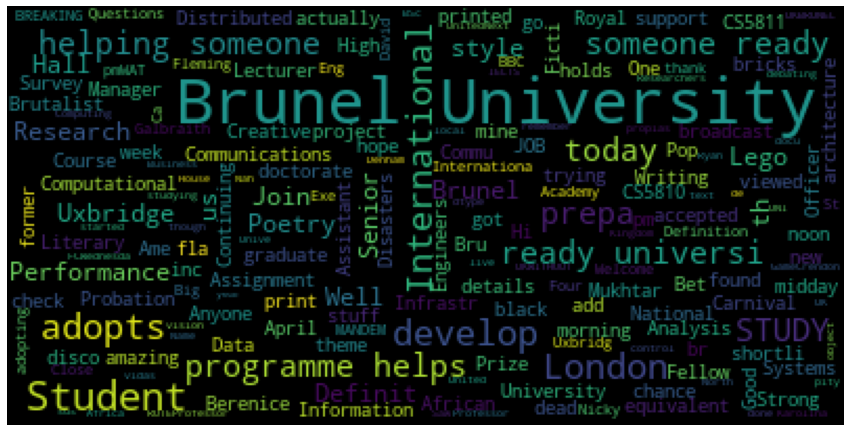

In [17]:
from wordcloud import WordCloud
import preprocessor as p
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv('https://raw.githubusercontent.com/JefNtungila/Brunel/main/brunel_university.csv')

#cleaning tweets to remove urls etc
text = df['text'].apply(lambda x: p.clean(x))

wordcloud = WordCloud().generate(str(text))


figure(figsize=(15, 10))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Sentiment Analysis of Tweets about Brunel University

In [18]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 18.2MB/s 


In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
pd.options.display.max_colwidth = 100

def sentiment_analyser(x):

  sid = SentimentIntensityAnalyzer()

  output = sid.polarity_scores(x)

  return output


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
df['sentiment'] = df['text'].apply(lambda x: sentiment_analyser(x))
df['final_sentiment'] = df['sentiment'].apply(lambda x: x['compound'])

In [21]:
#mostly neutral tweets but with a slight tendency towards positivity

df['final_sentiment'].mean()

0.2652037735849056